In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def avto_reg_der(x, n = 2, alpha = 10):
    return x**(n+1) + x - alpha

def avto_reg_der2(x, n = 2, alpha = 10):
    return (n+1)*(x**(n)) + 1

def res_plot(history, history2 = None, label=None, label2=None, title=None, titl2 = None):
    size = len(history[0])
    size2 = len(history2[0])
    x = list(range(0, size))
    x2 = list(range(0, size2))
    figure, axis = plt.subplots(1, 2)
    axis[0].plot(x, np.log([x+1 for x in history[0]]), label = label)
    axis[0].set_xlabel("Итерации")
    axis[0].set_ylabel(title)
    if(history2 != None):
        axis[0].plot(x2, np.log([x+1 for x in history2[0]]), label = label2)

    axis[1].plot(x, np.log([abs(x)+1 for x in history[1]]), label = label)
    axis[1].set_xlabel("Итерации")
    axis[1].set_ylabel(titl2)
    if(history2 != None):
        axis[1].plot(x2, np.log([abs(x)+1 for x in history2[1]]), label = label2)
    plt.tight_layout()
    plt.legend()
    axis[0].grid(True)
    axis[1].grid(True)
    plt.show()

In [3]:
def Div_2(func, a = 0, b = 1, max_iter = 1000, eps = 0.001, history = None):
    for i in range(max_iter):
        c = (a+b)/2
        res_c = func(c)
        if(history != None):
            history[0].append(abs(a-b))
            history[1].append(abs(res_c))
        #if(abs(a-b) < eps):
        if(abs(res_c) < eps):
            return c
        if (np.sign(res_c) == np.sign(func(a))):
            a = c
        else:
            b = c
    return c


In [4]:
def Newton(func, func_der, x0, max_iter = 1000, eps = 0.001, history = None):
    for i in range(max_iter):
        x1 = x0 - func(x0)/func_der(x0)
        res_x1 = func(x1)
        if(history != None):
            history[0].append(abs(x1-x0))
            history[1].append(abs(res_x1))
        #if(abs(x1-x0) < eps):
        if(abs(res_x1) < eps):
            return x1
        x0 = x1
    return x1


In [5]:
max_iter = 1000
eps = 10**-6
n = 20
alpha = 10

def avto_reg_der_run(x):
    return avto_reg_der(x, n, alpha)
def avto_reg_der2_run(x):
    return avto_reg_der2(x, n, alpha)

In [6]:
history = [[], []]
x0 = Div_2(avto_reg_der_run, a = 0, b = 1000, max_iter=max_iter, eps=eps,  history=history)
print(x0, avto_reg_der_run(x0))
history2 = [[], []]
x0_ = Newton(avto_reg_der_run, avto_reg_der2_run, x0 =500 , max_iter=max_iter, eps=eps, history=history2)
print(x0_, avto_reg_der_run(x0_))

1.1096515081590042 -4.574330088047418e-07
1.1096515110022094 2.3775497126621303e-08


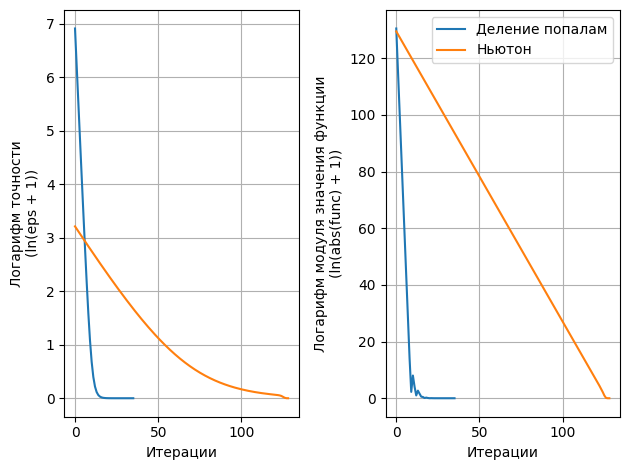

In [7]:
res_plot(history, history2, "Деление попалам", "Ньютон", "Логарифм точности\n(ln(eps + 1))", "Логарифм модуля значения функции\n(ln(аbs(func) + 1))")

In [8]:
history = [[], []]
history2 = [[], []]
for n in range(1, 22):
    def avto_reg_der_run(x):
        return avto_reg_der(x, n, alpha)
    def avto_reg_der2_run(x):
        return avto_reg_der2(x, n, alpha)
    
    history_ = [[], []]
    x0 = Div_2(avto_reg_der_run, a = 0, b = 1000, max_iter=max_iter, eps=eps,  history=history_)
    history[0].append(len(history_[0]))
    history[1].append(avto_reg_der_run(x0))
    history2_ = [[], []]
    x0_ = Newton(avto_reg_der_run, avto_reg_der2_run, x0 = 500 , max_iter=max_iter, eps=eps, history=history2_)
    history2[0].append(len(history2_[0]))
    history2[1].append(avto_reg_der_run(x0_))
    print(x0, avto_reg_der_run(x0))

2.7015621308237314 7.752459119103605e-08
1.9999999785795808 -2.784654462573144e-07
1.6974718892015517 1.718653042104279e-07
1.5330127789638937 -5.632416861800493e-07
1.4305151416920125 7.640571837441712e-07
1.3607621076516807 3.4966546635928353e-07
1.3103144010528922 9.97443164507672e-07
1.2721699895337224 7.683870908437029e-07
1.2423353036865592 -9.094848092416896e-07
1.2183710059616715 4.869488154923829e-07
1.1987047182628885 -2.929266713636025e-07
1.1822783126262948 2.6356924465176235e-07
1.1683538759825751 -1.5741879799691105e-07
1.1564013839233667 3.677297488735576e-07
1.1460303649073467 -6.628682331921709e-07
1.1369469430064783 4.4391712172853204e-07
1.1289256653981283 4.0087432218172125e-07
1.1217907740501687 7.960961827535584e-07
1.1154031963087618 -6.167898121134385e-07
1.1096515081590042 -4.574330088047418e-07
1.1044453422073275 -3.4692612516096233e-07


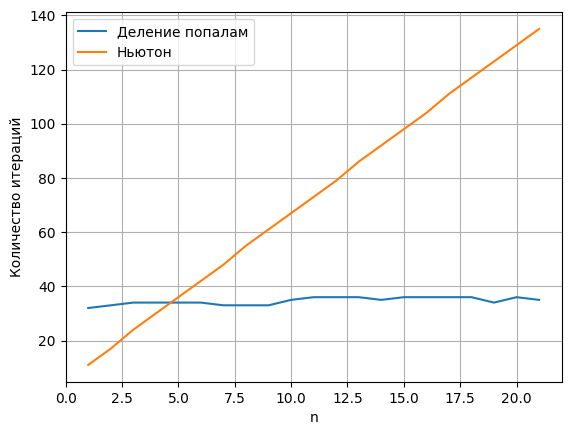

In [9]:
def res_plot2(history, history2 = None, label=None, label2=None, title=None, titl2 = None):
    size = len(history[0])
    x = list(range(1, size+1))
    figure, axis = plt.subplots(1, 1)
    axis.plot(x, history[0], label = label)
    axis.set_xlabel("n")
    axis.set_ylabel(title)
    if(history2 != None):
        axis.plot(x, history2[0], label = label2)

    plt.legend()
    axis.grid(True)
    plt.show()

res_plot2(history, history2, "Деление попалам", "Ньютон", "Количество итераций", "Значение функции в найденной точке")

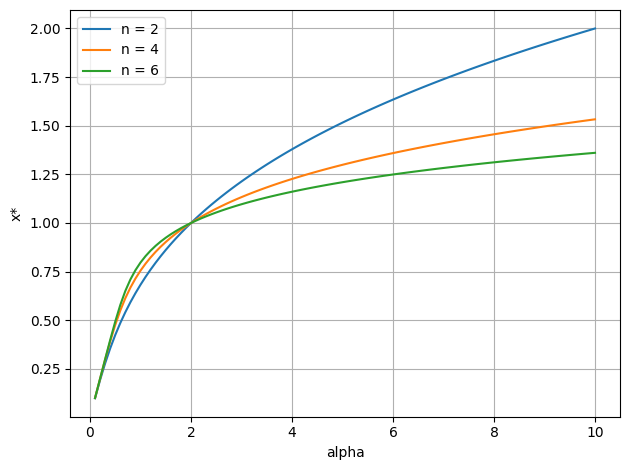

In [11]:
def avto_reg_der_f(x, n = 2, alpha = 10):
    return -(alpha*n*(x**(n-1))/((1 + x**n)**2) + 1)

x = list(np.linspace(0.1, 10, 100))
figure, axis = plt.subplots(1, 1)
axis.set_xlabel("alpha")
axis.set_ylabel("x*")

for n in [2, 4, 6]:
    history = []
    for alpha in np.linspace(0.1, 10, 100):
        def avto_reg_der_run(x):
            return avto_reg_der(x, n, alpha)
        
        x0 = Div_2(avto_reg_der_run, a = 0, b = 1000, max_iter=max_iter, eps=eps)
        history.append(x0)
    axis.plot(x, history, label = "n = " + str(n))

plt.tight_layout()
plt.legend()
axis.grid(True)
plt.show()